In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

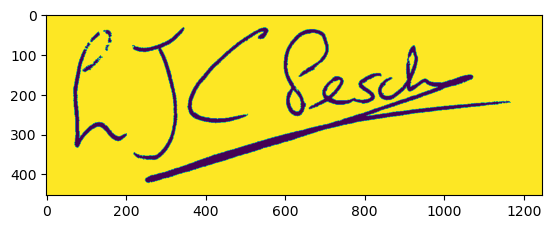

In [2]:
img = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

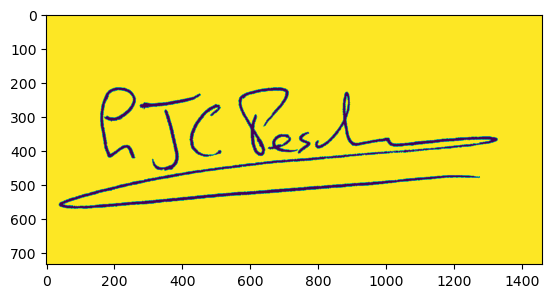

In [3]:
img1 = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [4]:
import glob
gen = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [5]:
import cv2

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [6]:
train_data.shape

(540, 224, 224, 3)

In [7]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

# CNN (CONVOLUTION NEURAL NETWORK)

### RELU ACTIVATION FUNCTION

In [8]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def objective(x, y):
 return x**2.0 + y**2.0


network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1
network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [10]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 36s 69ms/step - loss: 0.7038 - accuracy: 0.4834 - val_loss: 0.6931 - val_accuracy: 0.4815
Epoch 2/3
513/513 [==============================] - 35s 69ms/step - loss: 0.6931 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.3704
Epoch 3/3
513/513 [==============================] - 35s 67ms/step - loss: 0.6931 - accuracy: 0.4932 - val_loss: 0.6931 - val_accuracy: 0.6296


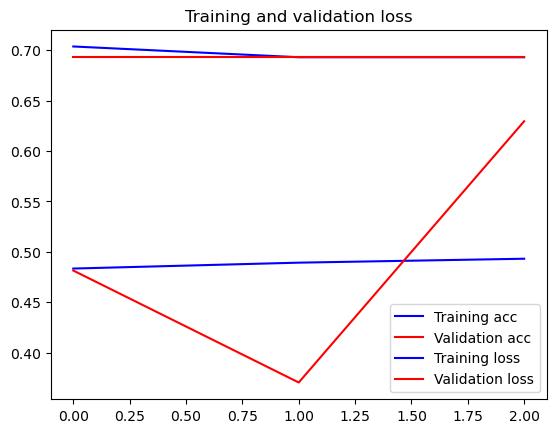

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [12]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 3s 429ms/step


array([[0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.49997061, 0.5000294 ],
       [0.50000566, 0.49999434],
       [0.5000054 , 0.49999455],
       [0.50000817, 0.49999183],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.50002015, 0.49997988],
       [0.50020516, 0.4997949 ],
       [0.4999877 , 0.50001234],
       [0.49996093, 0.5000391 ],
       [0.50000566, 0.49999434],
       [0.50000566, 0.49999434],
       [0.49991247, 0.5000875 ],
       [0.

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.45

### SIGMOID ACTIVATION FUNCTION

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='sigmoid'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='sigmoid'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'sigmoid'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1

network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 39s 75ms/step - loss: 0.8008 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.6296
Epoch 2/3
513/513 [==============================] - 38s 74ms/step - loss: 0.7245 - accuracy: 0.5263 - val_loss: 0.6983 - val_accuracy: 0.3704
Epoch 3/3
513/513 [==============================] - 38s 74ms/step - loss: 0.7037 - accuracy: 0.5068 - val_loss: 0.6933 - val_accuracy: 0.3704


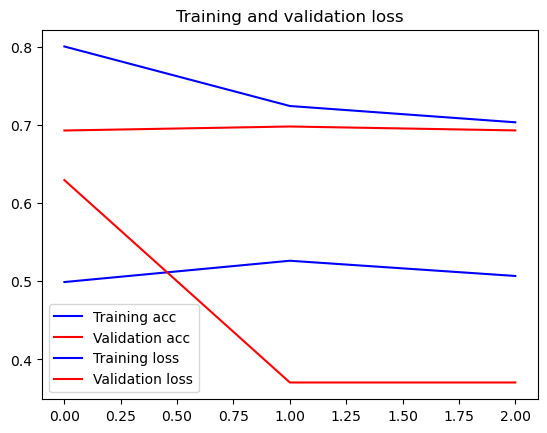

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [17]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 2s 386ms/step


array([[0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.4922238 , 0.50777614],
       [0.

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

### TANH ACTIVATION FUNCTION

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='tanh'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='tanh'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'tanh'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1

network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [20]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 4
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/4
513/513 [==============================] - 39s 75ms/step - loss: 1.0250 - accuracy: 0.4932 - val_loss: 0.6935 - val_accuracy: 0.3704
Epoch 2/4
513/513 [==============================] - 38s 74ms/step - loss: 0.7900 - accuracy: 0.5380 - val_loss: 0.6935 - val_accuracy: 0.3704
Epoch 3/4
513/513 [==============================] - 38s 74ms/step - loss: 0.7427 - accuracy: 0.5088 - val_loss: 0.6933 - val_accuracy: 0.6296
Epoch 4/4
513/513 [==============================] - 38s 74ms/step - loss: 0.7127 - accuracy: 0.4795 - val_loss: 0.6936 - val_accuracy: 0.6296


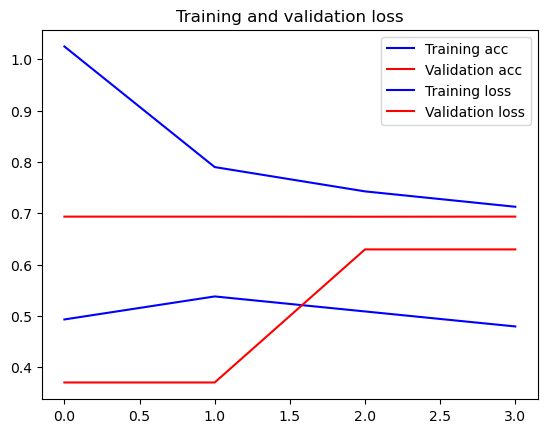

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [21]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [22]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 3s 390ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

<hr>

# SIAMESE NEURAL NETWORK

## DISTANCES USED

* Euclidean Distance
* Manhattan Distance
* Hamming Distance
* Minkowski Distance


## **1. Using Euclidean Distance**

## SIGMOID ACTIVATION FUNCTION

In [24]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [25]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 128)          5328800     ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

In [26]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 0.8846 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 0.7637 - accuracy: 0.4625 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.7476 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.7501 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.7311 - accuracy: 0.5500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.7222 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.7311 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
5/5 [========================

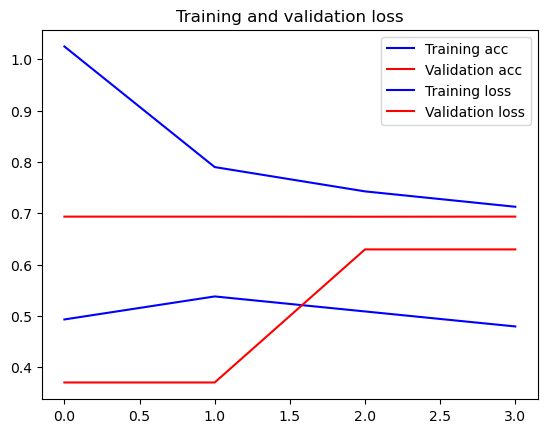

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [27]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [28]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 2s 389ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## RELU ACTIVATION FUNCTION 

In [30]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_3 (Functional)           (None, 128)          5328800     ['input_7[0][0]',                
                                                                  'input_8[0][0]']          

In [31]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='relu')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 7.5197 - accuracy: 0.5125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 8/10
5/5 [=========================

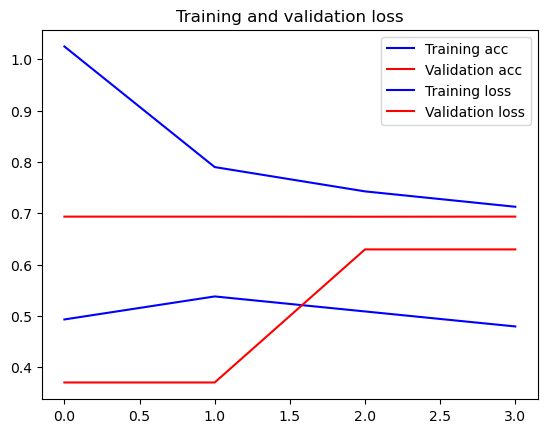

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [32]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [33]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 2s 394ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## **2. Using Manhattan Distance**

## Using RELU Activation Function

In [35]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_6 (Functional)           (None, 128)          5328800     ['input_12[0][0]',               
                                                                  'input_13[0][0]']         

In [36]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def manhattan_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='relu')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(manhattan_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 5.9091 - accuracy: 0.6125 - val_loss: 6.8622 - val_accuracy: 0.5500
Epoch 8/10
5/5 [=========================

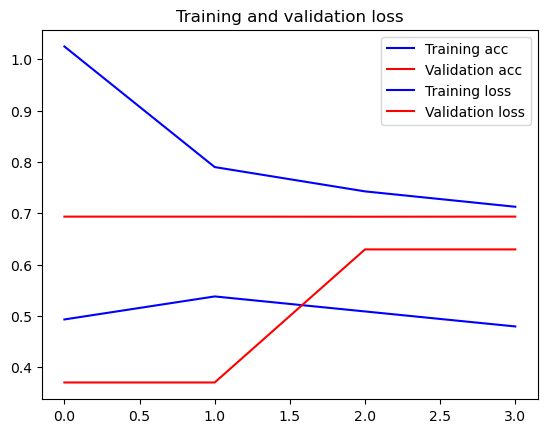

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [37]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [38]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 2s 389ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## Using SIGMOID Activation Function

In [40]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='sigmoid')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='sigmoid')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='sigmoid')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_9 (Functional)           (None, 128)          5328800     ['input_17[0][0]',               
                                                                  'input_18[0][0]']        

In [41]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def manhattan_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(manhattan_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 0.7205 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 0.6920 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.6976 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.6895 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.6942 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.6964 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.6960 - accuracy: 0.4250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
5/5 [=========================

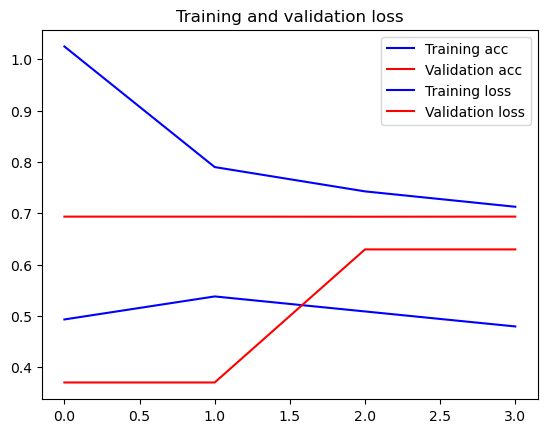

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [42]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [43]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 3s 406ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [44]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_recall_fscore_support
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

In [45]:
from sklearn.metrics import precision_recall_fscore_support

# calculate precision, recall, and F1 score
precision, recall, f1score, _ = precision_recall_fscore_support(test_labels, pred.argmax(axis=1), average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Precision:  0.25
Recall:  0.5
F1 Score:  0.3333333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **3. Using Hamming Distance**

## Using RELU Activation Function

In [46]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_23 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_12 (Functional)          (None, 128)          5328800     ['input_22[0][0]',               
                                                                  'input_23[0][0]']        

In [47]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
import binascii
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

@tf.function
def hamming_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)

# define the output layer
distance = Lambda(hamming_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 13s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 6.3628 - accuracy: 0.5875 - val_loss: 6.1700 - val_accuracy: 0.6000
Epoch 8/10
5/5 [=============================

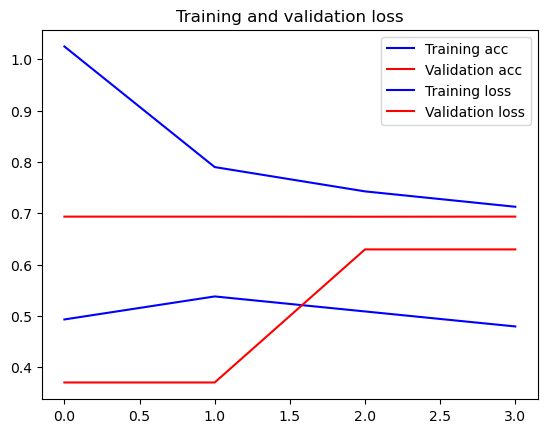

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [49]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 4s 721ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## Using SIGMOID Activation Function

In [51]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_28 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_15 (Functional)          (None, 128)          5328800     ['input_27[0][0]',               
                                                                  'input_28[0][0]']        

In [52]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
import binascii
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

@tf.function
def hamming_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)

# define the output layer
distance = Lambda(hamming_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 13s 3s/step - loss: 7.3268 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 7.3268 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 3/10
5/5 [==============================] - 14s 3s/step - loss: 7.3269 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 7.3269 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 7.3269 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 7.3268 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 7.3268 - accuracy: 0.5250 - val_loss: 6.9412 - val_accuracy: 0.5500
Epoch 8/10
5/5 [=============================

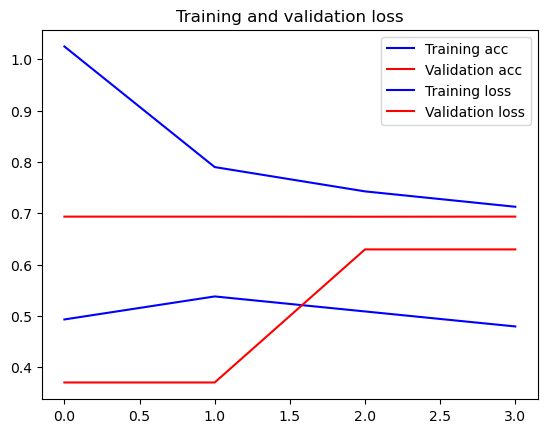

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [53]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [54]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 5s 737ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## **4. Using Minkowski Distance**

## Using RELU Activation Function

In [56]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_33 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_18 (Functional)          (None, 128)          5328800     ['input_32[0][0]',               
                                                                  'input_33[0][0]']        

In [57]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np

# Define the input shape for the network
input_shape = (224, 224, 3)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# Create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric function using Minkowski distance
def minkowski_distance(vectors):
    (featsA, featsB) = vectors
    diff = K.abs(featsA - featsB)
    return K.sum(K.pow(diff, 3), axis=-1, keepdims=True)

# Define the output layer
distance = Lambda(minkowski_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# Create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# Train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 14s 3s/step - loss: 6.1402 - accuracy: 0.6000 - val_loss: 1.3076 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 6.1333 - accuracy: 0.6000 - val_loss: 1.0200 - val_accuracy: 0.6000
Epoch 3/10
5/5 [==============================] - 14s 3s/step - loss: 6.1333 - accuracy: 0.6000 - val_loss: 0.8825 - val_accuracy: 0.6500
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 6.1333 - accuracy: 0.6000 - val_loss: 0.8373 - val_accuracy: 0.5500
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 6.1333 - accuracy: 0.6000 - val_loss: 0.8460 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 6.1333 - accuracy: 0.6000 - val_loss: 0.8629 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 6.1333 - accuracy: 0.6000 - val_loss: 0.8816 - val_accuracy: 0.6000
Epoch 8/10
5/5 [=============================

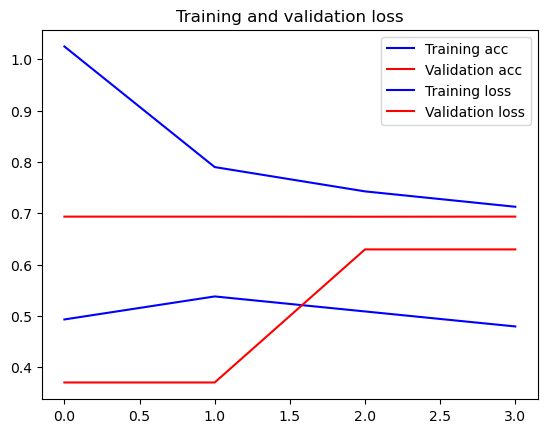

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [58]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [59]:
pred = network.predict(test_data)
pred

6/6 [==============================] - 5s 750ms/step


array([[0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.51434416, 0.4856559 ],
       [0.

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

<hr>

# CONVOLUTIONAL SIAMESE NEURAL NETWORK

In [61]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np

# Define the input shape for the network
input_shape = (224, 224, 3)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# Create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric function using Euclidean distance
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    squared_diff = K.square(featsA - featsB)
    return K.sqrt(K.sum(squared_diff, axis=1, keepdims=True))

# Define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# Create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# Train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 13s 3s/step - loss: 2.1012 - accuracy: 0.5750 - val_loss: 0.7000 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 0.7058 - accuracy: 0.5750 - val_loss: 0.6967 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 0.6784 - accuracy: 0.5750 - val_loss: 0.7055 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 0.6961 - accuracy: 0.5750 - val_loss: 0.6926 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.6928 - accuracy: 0.5625 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.5125 - val_loss: nan - val_accuracy: 0.6000
Epoch 8/10
5/5 [==============================] - 1

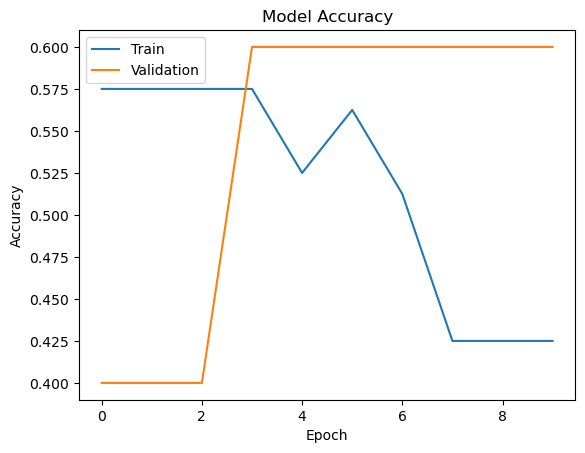

Final Training Accuracy: 42.50%
Final Validation Accuracy: 60.00%


In [62]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the final training and validation accuracy
print("Final Training Accuracy: {:.2f}%".format(history.history['accuracy'][-1]*100))
print("Final Validation Accuracy: {:.2f}%".format(history.history['val_accuracy'][-1]*100))

In [63]:
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Training accuracy: 0.42500001192092896
Validation accuracy: 0.6000000238418579


# Recurrent Neural Network (RNN)

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense_36 (Dense)            (None, 10)                330       
                                                                 
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 204s 136ms/step - loss: 0.7807 - accuracy: 0.7576 - val_loss: 0.3608 - val_accuracy: 0.8903
Epoch 2/10
1500/1500 [==============================] - 193s 129ms/step - loss: 0.2726 - accuracy: 0.9179 - val_loss: 0.2439 - val_accuracy: 0.9263
Epoch 3/10
1500/1500 [==============================] - 193s 129ms/step - loss: 0.1938

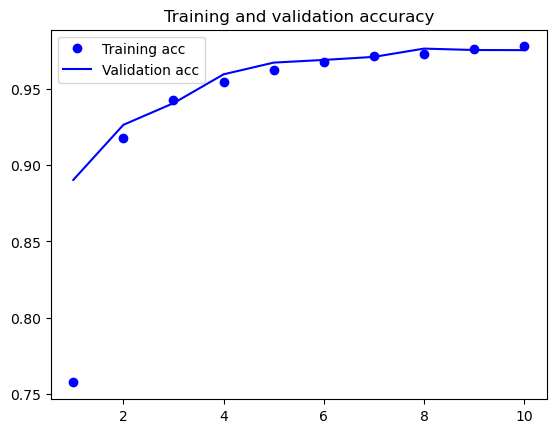

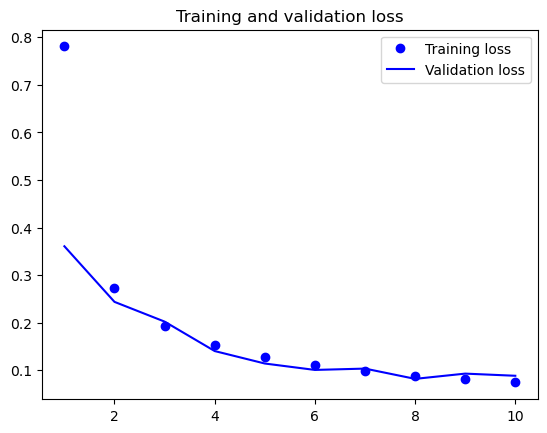

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.LSTM(32, input_shape=(train_data.shape[1], train_data.shape[2])),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [65]:
# train the model
# history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 18s 58ms/step - loss: 0.0868 - accuracy: 0.9754
Final Loss: 8.68%
Final Accuracy: 97.54%


# **Bi-directional Recurrent Neural Network (B-RNN)**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 28, 64)           15616     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 41,098
Trainable params: 41,098
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 764s 509ms/step - loss: 0.4887 - accuracy: 0.8434 - val_loss: 0.1486 - val_accuracy: 0.9561
Epoch 2/10
1500/1500 [===========

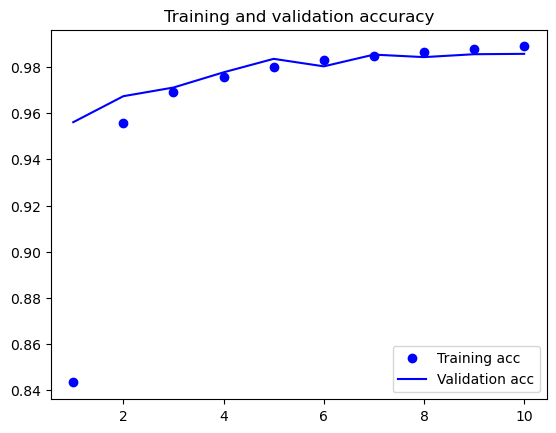

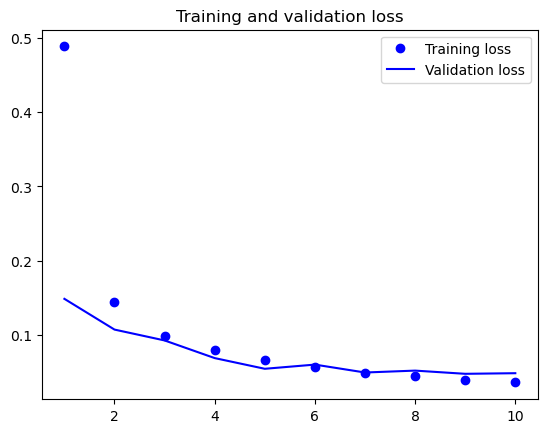

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(32, dropout=0.1, return_sequences=True), input_shape=(train_data.shape[1], train_data.shape[2])),
    layers.Bidirectional(layers.LSTM(32, dropout=0.1)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 57s 181ms/step - loss: 0.0432 - accuracy: 0.9871
Final Loss: 4.32%
Final Accuracy: 98.71%


# **Convolutional Recurrent Neural Network (CRNN)**

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_24 (Flatten)        (None, 576)             

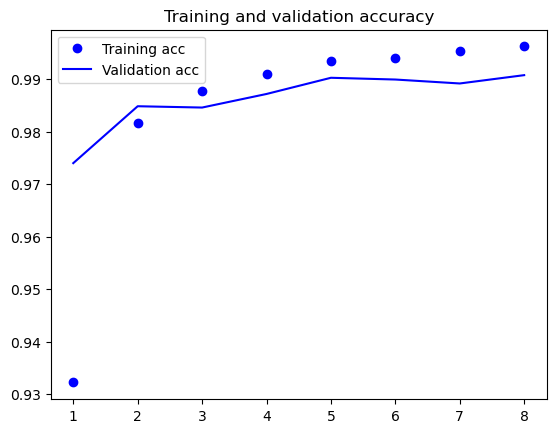

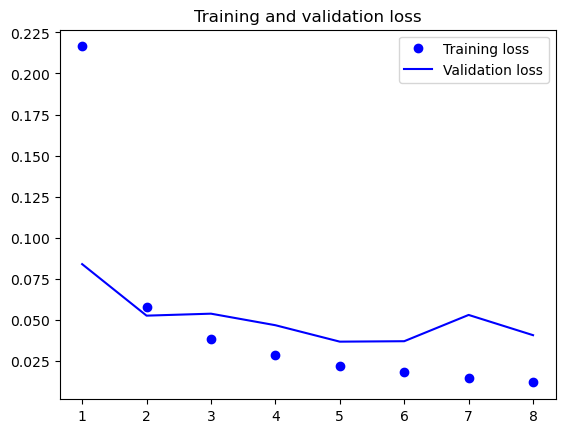

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=64, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [69]:
# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 7s 22ms/step - loss: 0.0331 - accuracy: 0.9907
Final Loss: 3.31%
Final Accuracy: 99.07%
